In [2]:

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0-rc1


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 0s 1us/step


In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [7]:
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
raw_dataset.shape

(398, 8)

In [8]:
raw_dataset.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [9]:
raw_dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

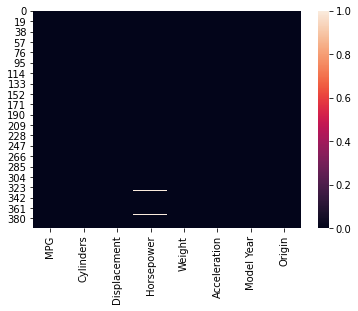

In [10]:
sns.heatmap(raw_dataset.isna())

In [0]:
dataset=raw_dataset.dropna()

In [12]:
dataset['Origin']=pd.Categorical(dataset['Origin'])
dataset['Origin']=dataset['Origin'].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


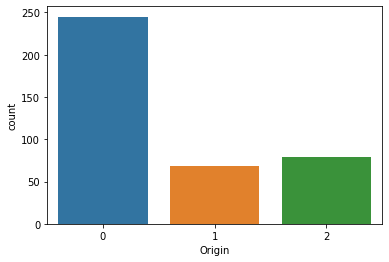

In [13]:
sns.countplot(x="Origin",data=dataset)

In [0]:
from sklearn.model_selection import train_test_split
Y=dataset.pop('MPG')
X=dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

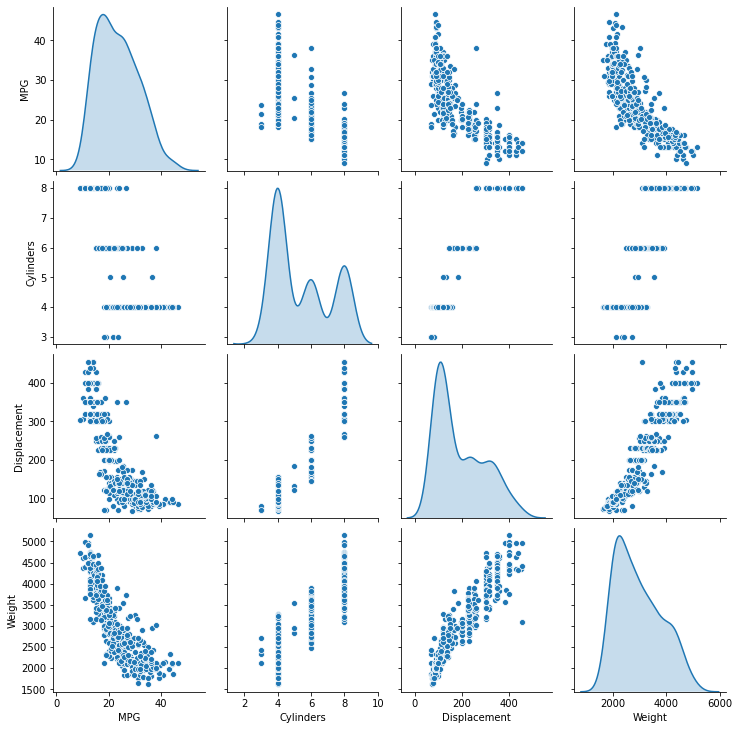

In [16]:
sns.pairplot(raw_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
def build_model():
  model=keras.Sequential(layers=[layers.Dense(64,activation='relu',input_shape=[7]),layers.Dense(64,activation='relu'),layers.Dense(1)])
  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
  return model

In [0]:
model=build_model()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train,Y_train,epochs=1000,verbose=1,validation_split=0.2,callbacks=[tfdocs.modeling.EpochDots()])

In [35]:
test_predictions=model.predict(X_test)
test_predictions

array([[18.598387 ],
       [13.9511595],
       [32.585262 ],
       [23.430092 ],
       [32.679214 ],
       [31.701666 ],
       [40.375896 ],
       [18.835348 ],
       [35.202274 ],
       [14.68872  ],
       [23.244907 ],
       [18.061584 ],
       [22.0526   ],
       [12.697399 ],
       [14.956236 ],
       [20.784172 ],
       [21.481838 ],
       [24.08201  ],
       [25.599485 ],
       [36.93817  ],
       [19.085386 ],
       [28.457447 ],
       [19.278639 ],
       [26.872396 ],
       [36.392803 ],
       [14.858483 ],
       [19.91091  ],
       [20.379217 ],
       [27.594673 ],
       [13.827937 ],
       [12.847444 ],
       [33.654945 ],
       [17.530916 ],
       [25.29506  ],
       [17.819193 ],
       [22.991491 ],
       [14.869689 ],
       [26.001047 ],
       [17.930613 ],
       [28.15361  ],
       [16.631044 ],
       [19.71062  ],
       [27.082409 ],
       [13.619412 ],
       [30.939785 ],
       [26.8538   ],
       [20.036083 ],
       [20.36

(0.0, 50.0)

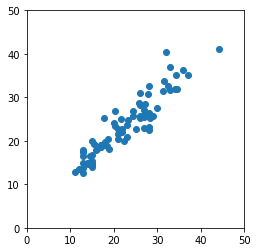

In [39]:
plt.axes(aspect='equal')
plt.scatter(Y_test,test_predictions)
plt.xlim([0,50])
plt.ylim([0,50])

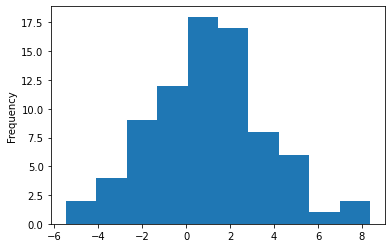

In [44]:
error=test_predictions.flatten()-Y_test
error.plot.hist()

(array([ 2.,  4.,  9., 12., 18., 17.,  8.,  6.,  1.,  2.]),
 array([-5.47219849, -4.08738899, -2.7025795 , -1.31777   ,  0.06703949,
         1.45184898,  2.83665848,  4.22146797,  5.60627747,  6.99108696,
         8.37589645]),
 <a list of 10 Patch objects>)

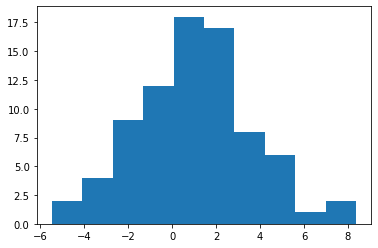

In [45]:
plt.hist(error)